# Python Workshop

## NumPy

### Motivation

NumPy是Python中的一个运算速度非常快的一个数学库，它非常重视数组。它允许你在Python中进行向量和矩阵计算，并且由于许多底层函数实际上是用C编写的，因此你可以体验在原生Python中永远无法体验到的速度。

### Array

In [1]:
import numpy as np

# Create 1D Array
a = np.array([0, 1, 2, 3, 4])
b = np.array((0, 1, 2, 3, 4))
c = np.arange(5)
d = np.linspace(0, 2*np.pi, 5)
print(a)
print(b)
print(c)
print(d)

[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0.         1.57079633 3.14159265 4.71238898 6.28318531]


In [2]:
# Create a matrix
a = np.array([
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28 ,29, 30],
              [31, 32, 33, 34, 35]])

print(a)

[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


一些有用的创建函数

In [3]:
print(np.eye(3)) #单位矩阵
print(np.eye(3,5))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [4]:
print(np.diag([1, 2, 3]))#对角矩阵

print(np.diag([1, 2, 3], 1))

a = np.array([[1, 2], [3, 4]]) #返回对角的值
print(np.diag(a))

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]
 [0 0 0 0]]
[1 4]


In [5]:
print(np.zeros((2,3)))
print(np.zeros((2, 3, 2)))
print(np.ones((2, 3)))
print(np.ones((2, 3, 2)))

[[0. 0. 0.]
 [0. 0. 0.]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]


In [6]:
from numpy.random import default_rng
default_rng(42).random((2,3))
default_rng(42).random((2,3,2))

array([[[0.77395605, 0.43887844],
        [0.85859792, 0.69736803],
        [0.09417735, 0.97562235]],

       [[0.7611397 , 0.78606431],
        [0.12811363, 0.45038594],
        [0.37079802, 0.92676499]]])

- Slicing

  Python中的切片意味着将元素从一个给定索引取出到另一个给定索引

  切片的语法

  ```python

  print(array[[x,y],[a,b]])

  print(array[start:end])

  print(array[start:end:step])
  ```

  start默认为0，end默认为array的长度，step默认为1。**Caution**：start会包括在内而end不会被包括在内

In [7]:
array=range(1,10)

print(array[-3:]) #Compare to matlab end-3

print(array[-3:-1]) # array[end-3, end-1]

range(7, 10)
range(7, 9)


  **Quiz**: 输出二维数组的奇数行奇数列元素，第二行，第三列，第一行的第二第四个元素，第二第四行的第一第三个元素。

  **Answer**

In [8]:
a = np.array(
    [[11, 12, 13, 14, 15],
            [16, 17, 18, 19, 20],
            [21, 22, 23, 24, 25],
            [26, 27, 28 ,29, 30],
            [31, 32, 33, 34, 35]])
print(a[::2,::2])
print()
print(a[1, :])
print()
print(a[:, 2])
print()
print(a[0,[1,3]])
print()
print(a[[1,1,3,3],[0,2,0,2]])

[[11 13 15]
 [21 23 25]
 [31 33 35]]

[16 17 18 19 20]

[13 18 23 28 33]

[12 14]

[16 18 26 28]


- Array Properties

In [9]:
a = np.array([
            [11, 12, 13, 14, 15],
            [16, 17, 18, 19, 20],
            [21, 22, 23, 24, 25],
            [26, 27, 28 ,29, 30],
            [31, 32, 33, 34, 35]])

print(type(a)) # >>><class 'numpy.ndarray'>
print(a.dtype) # >>>int64
print(a.size) # >>>25
print(a.shape) # >>>(5, 5)
print(a.itemsize) # >>>8
print(a.ndim) # >>>2
print(a.nbytes) # >>>200

<class 'numpy.ndarray'>
int64
25
(5, 5)
8
2
200



  数组的形状是它有多少行和列，上面的数组有5行和5列，所以它的形状是(5，5)。

  itemsize属性是每个项占用的字节数。这个数组的数据类型是int 64，一个int 64中有64位，一个字节中有8位，除以64除以8，你就可以得到它占用了多少字节，在本例中是8。

  ndim 属性是数组的维数。这个有2个。例如，向量只有1。

  nbytes 属性是数组中的所有数据消耗掉的字节数。你应该注意到，这并不计算数组的开销，因此数组占用的实际空间将稍微大一点。

  ### Caculation

  术语“broadcast”描述了 NumPy 在算术运算期间如何处理不同形状的数组。受到某些限制，较小的数组会“广播”到较大的数组上，以便它们具有兼容的形状。广播提供了一种向量化数组操作的方法，以便循环发生在 C 而不是 Python 中。它无需制作不必要的数据副本即可完成此操作，并且通常会实现高效的算法实现。然而，在某些情况下，broadcast并不是一个好主意，因为它会导致内存使用效率低下，从而减慢计算速度。

In [10]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
print(a * b)

a = np.array([1.0, 2.0, 3.0])
b = 2.0
print(a * b)

print(a+b)

[2. 4. 6.]
[2. 4. 6.]
[3. 4. 5.]


In [11]:
from numpy import array, argmin, sqrt, sum
observation = array([111.0, 188.0])
codes = array([
               [102.0, 203.0],
               [132.0, 193.0],
               [45.0, 155.0],
               [57.0, 173.0]])
diff = codes - observation    # the broadcast happens here
dist = sqrt(sum(diff**2,axis=-1))
argmin(dist)

0

  想要更深入地了解[参见](https://numpy.org/doc/stable/user/basics.broadcasting.html#broadcastable-arrays)

  - 点乘与叉乘

In [12]:
a = np.array([1,0,0])
b = np.array([0,1,0])
print(np.dot(a,b))

0


In [13]:
a = np.array([2,0])
b = np.array([2,2])
print(np.cross(a,b))
a = np.array([1,0,0])
b = np.array([0,1,0])
print(np.cross(a,b))
print(np.cross(b,a))

4
[0 0 1]
[ 0  0 -1]


### Matrix

In [14]:
# Get Inverse and Transpose

a=np.matrix([[1,3],[2,1]])

print(a)

print(a.I)

print(a.T)

[[1 3]
 [2 1]]
[[-0.2  0.6]
 [ 0.4 -0.2]]
[[1 2]
 [3 1]]


[参见](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)

In [15]:
a = np.arange(10)
print(a.sum()) # >>>45
print(a.min()) # >>>0
print(a.max()) # >>>9
print(a.cumsum()) # >>>[ 0  1  3  6 10 15 21 28 36 45]

45
0
9
[ 0  1  3  6 10 15 21 28 36 45]


线性代数

In [30]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(np.diag((1, 2, 3)))
print(eigenvalues)
print(eigenvectors)

[1. 2. 3.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


[参见](https://numpy.org/doc/stable/reference/routines.linalg.html)

  **Quiz**: 计算（1，2，3）和(4,5,6)的点乘和叉乘，并获取叉乘中最大的元素

### Replicating, joining, or mutating existing arrays

- view and copy

    view和copy可以类比为引用和拷贝，对于view的修改会直接作用到原始数据上，而copy则不会。

In [17]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a[:2]
b +=1
print('a =', a, '; b =', b)

a = [2 3 3 4 5 6] ; b = [2 3]


In [18]:
a = np.array([1, 2, 3, 4])
b = a[:2].copy()
b += 1
print('a = ', a, 'b = ', b)

a =  [1 2 3 4] b =  [2 3]


低维索引通常会产生view而高维通常为copy

In [19]:
# Demo for low dimension
x = np.arange(9).reshape(3, 3)
print(x)

y = x[[1, 2]]
y=y+1
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


```python
x = np.array([[1, 2],[3,4]])
y = x.view()
# Similarly copy can also be enforced

x = np.array([[1,2,3],[4,5,6]])
y = x.copy()
```

如何判断是否是副本

```python
x.base is None
```

- matrix的拼接

In [20]:
A = np.ones((2, 2))
B = np.eye(2, 2)
C = np.zeros((2, 2))
D = np.diag((-3, -4))
np.block([[A, B], [C, D]])

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 0.,  0., -3.,  0.],
       [ 0.,  0.,  0., -4.]])

- Reshape

    将一个matrix保持内容不变地变换形状

In [21]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

newarr = arr.reshape(4, 3)

print(newarr)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


当大小不确定时可以使用-1占位

In [22]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

newarr = arr.reshape(2, 2, -1)

print(newarr)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


将高维变成一维

In [23]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

newarr = arr.reshape(-1)

print(newarr)

[1 2 3 4 5 6]


**Quiz**: 将矩阵[1,2,3]改写成[[1,2,3],[4,5,6],[7,8,9]]再将矩阵转化为一维数组。使用broadcast拼接reshape等技巧。

- Bool

In [24]:
a=np.array([1,2,3,4,5,6]) # Masking
print(a[a<4])

[1 2 3]


In [25]:
a = np.arange(0, 100, 10)
b = a[:5]
c = a[a >= 50]
print(b) # >>>[ 0 10 20 30 40]
print(c) # >>>[50 60 70 80 90]

[ 0 10 20 30 40]
[50 60 70 80 90]


In [26]:
# Where
a = np.arange(0, 100, 10)
b = np.where(a < 50) 
c = np.where(a >= 50)[0]
print(b) # >>>(array([0, 1, 2, 3, 4]),)
print(c) # >>>[5 6 7 8 9]

(array([0, 1, 2, 3, 4]),)
[5 6 7 8 9]


### Vectorization

vectorize提供该功能主要是为了方便，而不是为了性能。该实现本质上是一个 for 循环。

In [27]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b

vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], 2)

array([3, 4, 1, 2])

### Advanced Numpy

- 多项式拟合

[3.98422909 1.62155833]


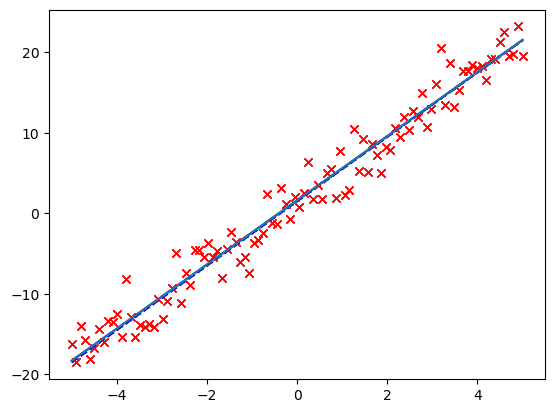

In [28]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d

x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')
coeff = polyfit(x, noise_y, 1)
print(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')
p = plt.plot(x, y, 'b--')

# Using poly1d
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))

**Quiz**: 使用多项式拟合sin函数

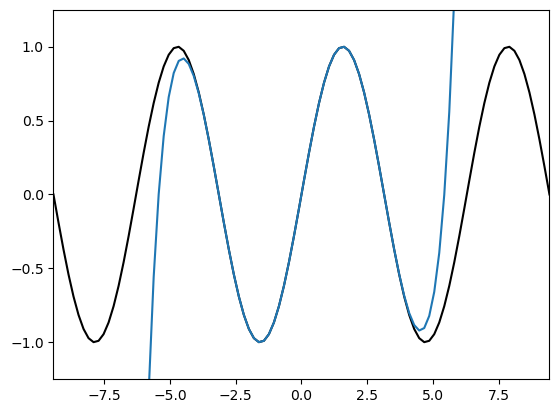

In [29]:
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)
y9 = poly1d(polyfit(x,y,9))
x = np.linspace(-3 * np.pi,3 * np.pi,100)

p = plt.plot(x, np.sin(x), 'k')
p = plt.plot(x, y9(x))

a = plt.axis([-3 * np.pi, 3 * np.pi, -1.25, 1.25])